In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import datetime as dt
import yfinance as yf

#### Importo los CSV obtenidos en data.ipynb

In [8]:
data = pd.read_csv('datos/stock_price.csv')
volatilidad = pd.read_csv('datos/volatilidad_mensual.csv')
top10 = pd.read_csv('datos/top10.csv')
corr_movil = pd.read_csv('datos/corr_movil.csv')

## Estudio de la correlación de la Crypto con las finanzas tradicionales

<AxesSubplot:>

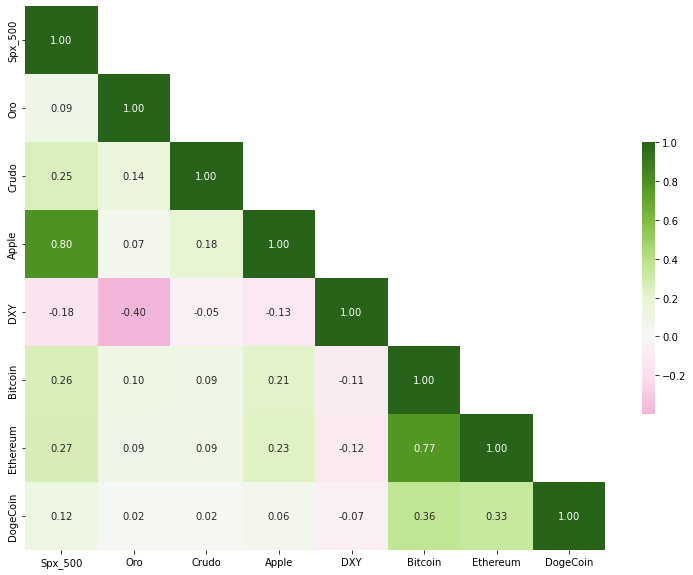

In [9]:
#El único valor 

data_corr = data.iloc[:,1:].pct_change().corr(method='pearson')

fig,ax = plt.subplots(figsize=(13,10))

mask = np.triu(np.ones_like(data_corr, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(data_corr,mask=mask,annot=True,cmap='PiYG',fmt='.2f',center=0,cbar_kws={'shrink':.5})

### Corr. móvil

In [24]:
fig = go.Figure(layout_title_text= 'Correlación entre Bitcoin y el Dollar')
fig.add_scattergl(x=corr_movil.Date, y=corr_movil['Dollar'], line={'color':'red'},name='Correlación Negativa')
fig.add_scattergl(x=corr_movil.Date, y=corr_movil.Dollar.where(corr_movil.Dollar >=0), line={'color':'green'},name='Correlación Positiva')
fig.show()

fig = go.Figure(layout_title_text= 'Correlación entre Bitcoin y la bolsa')
fig.add_scattergl(x=corr_movil.Date, y=corr_movil.SPX500, line={'color':'red'},name='Correlación Negativa')
fig.add_scattergl(x=corr_movil.Date, y=corr_movil.SPX500.where(corr_movil.SPX500 >=0), line={'color':'green'},name='Correlación Positiva')
fig.show()

fig = go.Figure(layout_title_text= 'Correlación entre BTC y el ORo')
fig.add_scattergl(x=corr_movil.Date, y=corr_movil.Oro, line={'color':'red'},name='Correlación Negativa')
fig.add_scattergl(x=corr_movil.Date, y=corr_movil.Oro.where(corr_movil.Oro >=0), line={'color':'green'},name='Correlación Positiva')
fig.show()

#### Candlesticks con Plotly

In [23]:
ticker = '^GSPC'
start = dt.datetime(2017,11,9)
end = dt.datetime.now()
nombre = 'Bolsa Estadounidense'

def candlesticks_plot(start=start,end=end,ticker=ticker,nombre=nombre):
    
    tick = yf.Ticker(ticker).history(start=start,end=end).reset_index()
    
    fig = go.Figure(data=[go.Candlestick(x=tick['Date'],
                    open= tick['Open'],
                    high= tick['High'],
                    low= tick['Low'],
                    close= tick['Close'])]
                )
    fig.update_layout(xaxis_rangeslider_visible=False,title=nombre)
    fig.show()
    
candlesticks_plot()
candlesticks_plot(ticker='BTC-USD',nombre='Bitcoin')
candlesticks_plot(ticker='GC=F',nombre='Oro')
candlesticks_plot(ticker='GC=F',nombre='Crudo')



### Top 10 de los países con más % de usuarios de crypto

In [6]:
fig = go.Figure(data=[go.Table(
    columnwidth=[300,600],
    header=dict(values=(top10.columns),
                fill_color='powderblue',
                align='right',
                height=30,
                ),
    cells=dict(values=[top10.Ranking,top10.País,top10['Porcentaje'],top10['Personas que poseen criptomonedas']],
               height = 25,
               font_size = 15,
               align='right',
               fill=dict(color=['mintcream', 'white']),
               line_color='lavenderblush')),          
])

fig.show()

#### Precios logarítmicos (queda mejor en PowerBI)

In [1]:
fig, ax = plt.subplots(figsize=(8, 6))

for price in data.iloc[:,1:].columns:
    plt.plot(data.Date,data[price],label=price)

plt.legend(loc='upper right')
plt.yscale('log')
plt.show();

NameError: name 'plt' is not defined

In [5]:
marketcap_oro_btc = pd.DataFrame({'Activo':['Bitcoin','Oro'],
                                'Capitalización en millones':[326270,11854000]
                                })
marketcap_oro_btc

,Activo,Capitalización en millones
0,Bitcoin,326270
1,Oro,11854000


In [15]:
import plotly.express as px

fig = px.histogram(df, x=marketcap_oro_btc.Activo, y=marketcap_oro_btc['Capitalización en millones'],
             barmode='group', title = 'Capitalización',
         
             height=600)
fig.show()

11854000/326270

36.331872375639804